**Μέρος 3ο - Χαρακτηριστικά Βραχέος Χρόνος Σημάτων Φωνής και Μουσικής**

***Ερώτημα 3.1:*** Χρειάζεται να φορτώσουμε το αρχείο speech_utterance.wav από το directory του υπολογιστή μας

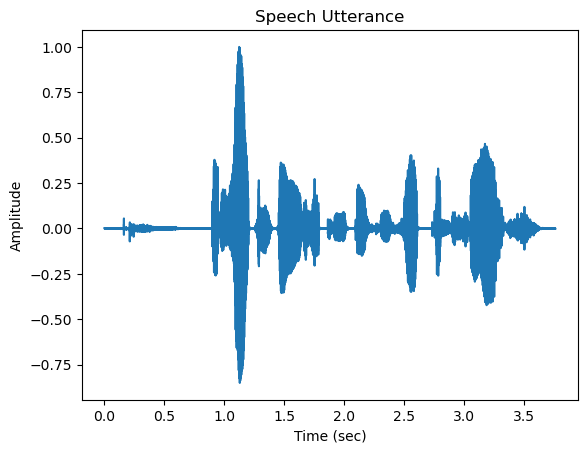

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import IPython
import os
from scipy.io import wavfile


# Open the audio file
cwd = os.getcwd()
file_path = os.path.join(cwd, 'speech_utterance.wav')
samplerate, audio_data = wavfile.read(file_path)

#Convert data to numpy array
audio_data = audio_data.astype(np.float32)

#Normalize the signal to the range [-1, 1]
audio_data /= np.abs(audio_data).max()

#Create a time axis for the signal
time = np.arange(len(audio_data))/samplerate

#Plot the waveform 
plt.plot(time, audio_data)
plt.title("Speech Utterance")
plt.ylabel("Amplitude")
plt.xlabel("Time (sec)")
plt.show()

***Ερώτημα 3.2:*** Θα απεικονίσουμε στο ίδιο παράθυρο τόσο το ίδιο το σήμα, όσο και την Ενέργεια Βραχέος Σήματος (Short Time Energy) και τον Ρυθμό Εναλλαγής Προσήμου (Zero Crossing Rate). Με τον τρόπο αυτό, είναι ευκολότερη η σύγκριση των σημάτων που προκύπτουν, σε σύγκριση με το αρχικό σήμα ήχου.

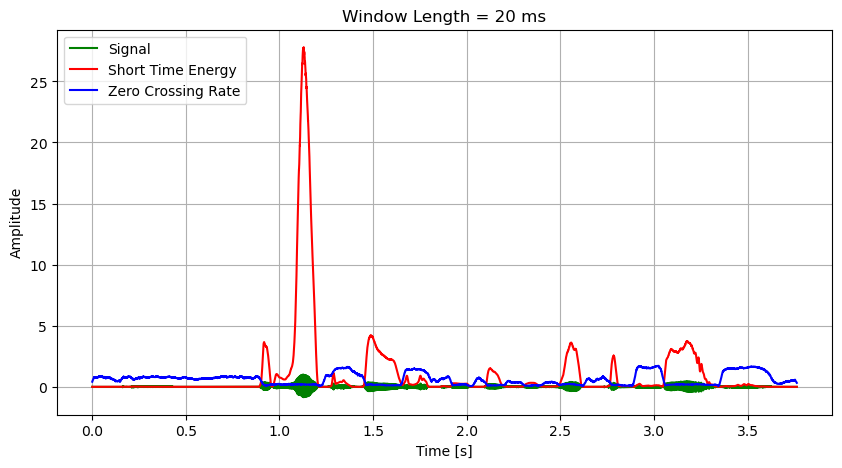

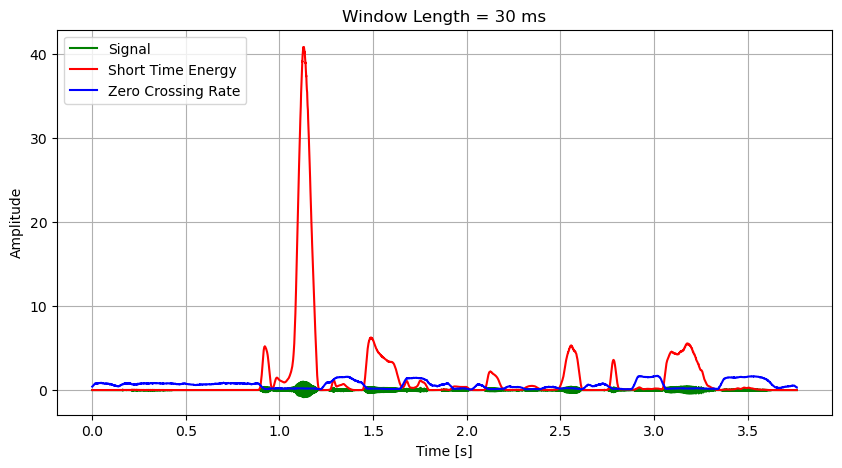

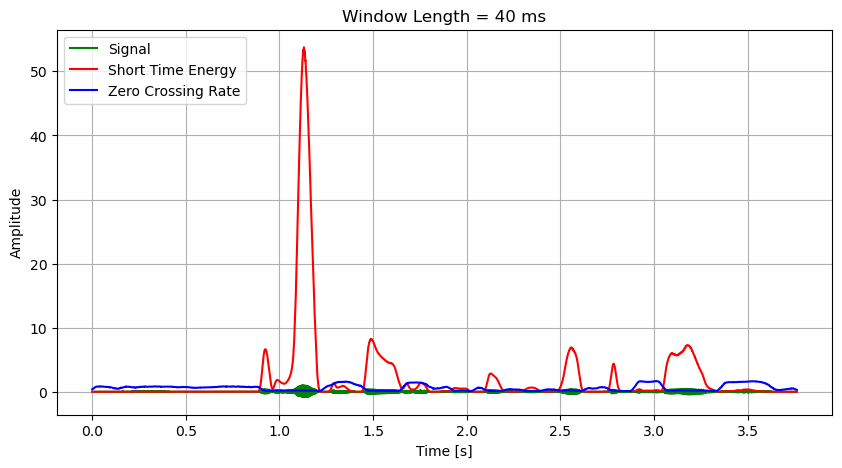

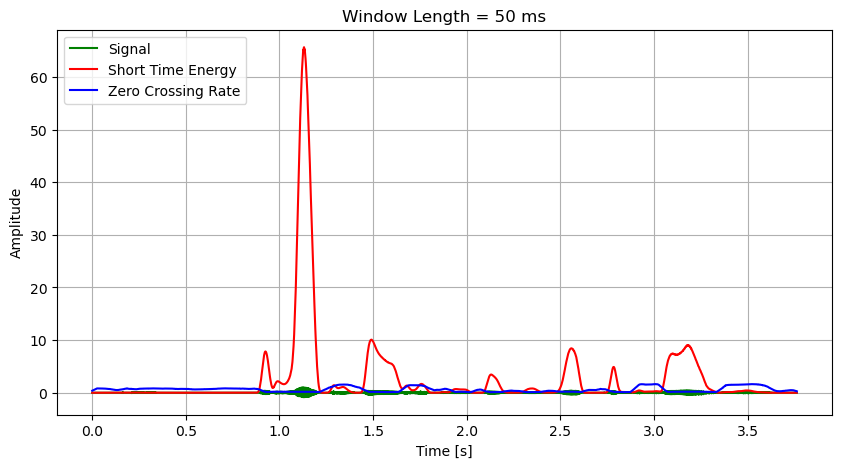

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.io import wavfile

def plot_ste_zcr(samplerate, audio_data, window_length_ms):
    # Create the squared signal to calculate the STE
    audio_square = audio_data ** 2
    
    # Create the zero crossing signal to calculate the ZCR
    audio_sign = np.sign(audio_data)
    zcr2 = np.concatenate(([0], audio_sign[:-1]))  # Shifted audio_sign by 1 sample to the right
    zcr = np.abs(audio_sign - zcr2)

    # Create the Hamming window
    window_length = int((window_length_ms / 1000) * samplerate)
    hamming_window = np.hamming(window_length)
    
    # Create the rectangular window
    rectangular_window = np.ones(window_length) / window_length
    
    # Compute the short-time energy and zero-crossing rate
    ste = np.convolve(audio_square, hamming_window, 'same')
    zcr = np.convolve(zcr, rectangular_window, 'same')
    
    # Plot the results
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(np.arange(len(audio_data)) / samplerate, audio_data, 'g')
    ax.plot(np.arange(len(audio_data)) / samplerate, ste, 'r')
    ax.plot(np.arange(len(audio_data)) / samplerate, zcr, 'b')
    ax.set(title=f'Window Length = {window_length_ms} ms', xlabel='Time [s]', ylabel='Amplitude')
    ax.legend(['Signal', 'Short Time Energy', 'Zero Crossing Rate'], loc='upper left')
    ax.grid()
    #ax.set_xlim([0.5, 1.5]) # Zoom in on the time frame 0.5-1.5 sec
    #ax.set_xlim([1.5, 3]) # Zoom in on the time frame 1.5-3 sec
    plt.show()

cwd = os.getcwd()
file_path = os.path.join(cwd, 'speech_utterance.wav')
samplerate, audio_data = wavfile.read(file_path)

plot_ste_zcr(samplerate, audio_data, window_length_ms=20)
plot_ste_zcr(samplerate, audio_data, window_length_ms=30)
plot_ste_zcr(samplerate, audio_data, window_length_ms=40)
plot_ste_zcr(samplerate, audio_data, window_length_ms=50)

***Ερώτημα 3.3***

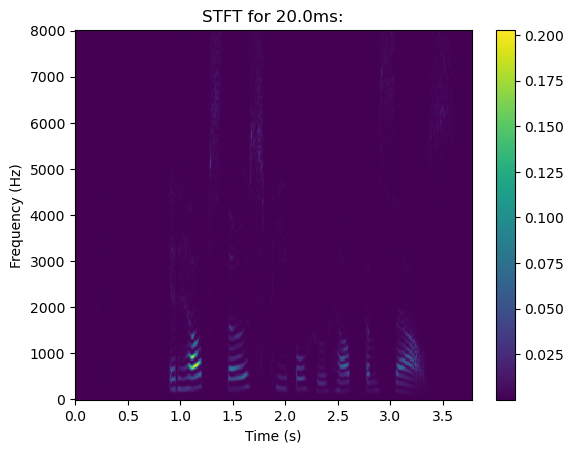

Central Centroid for 20.0 ms: 2855.725719381927
Spectral Flux for 20.0 ms : 0.023283642781695316


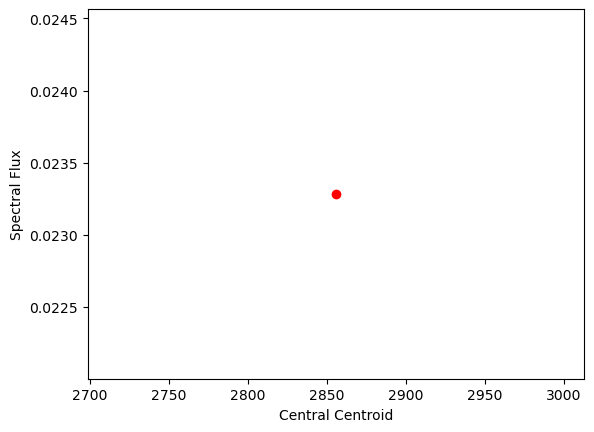

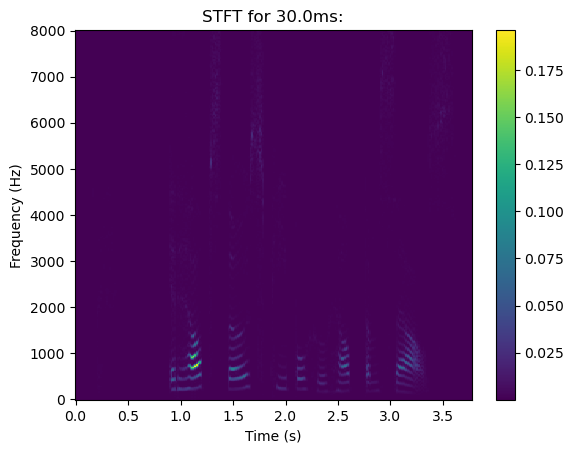

Central Centroid for 30.0 ms: 2875.082429942771
Spectral Flux for 30.0 ms : 0.032855073465938106


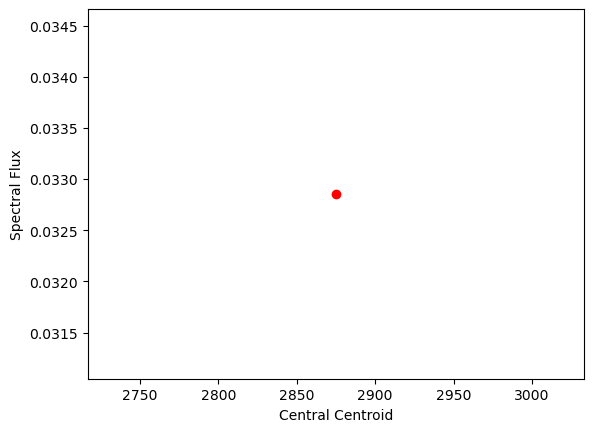

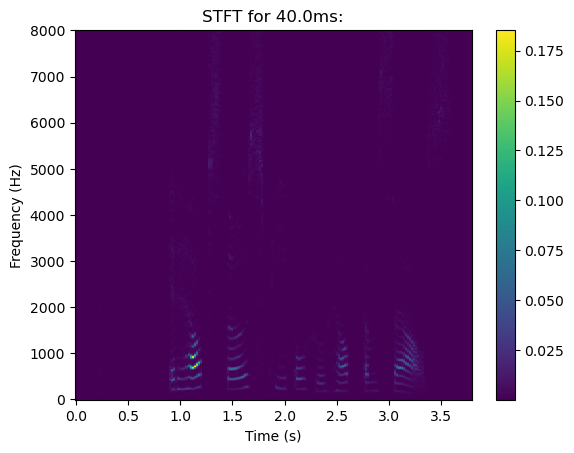

Central Centroid for 40.0 ms: 2884.888531169433
Spectral Flux for 40.0 ms : 0.04028933780781899


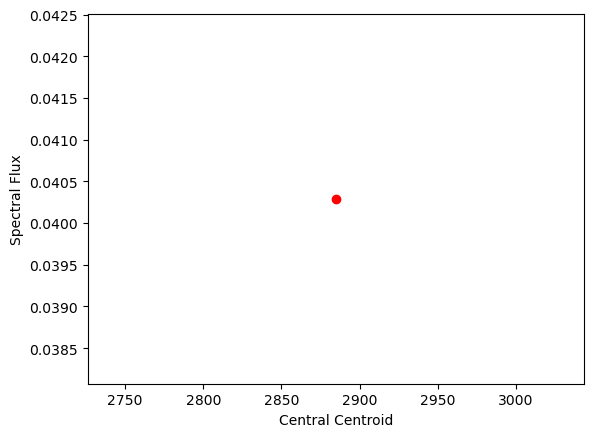

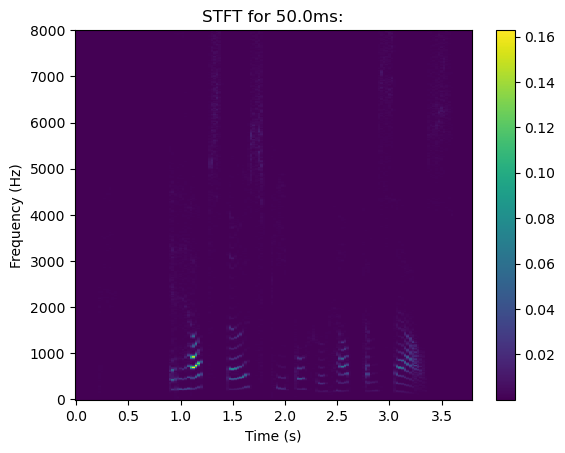

Central Centroid for 50.0 ms: 2880.0713458515584
Spectral Flux for 50.0 ms : 0.04457624950592827


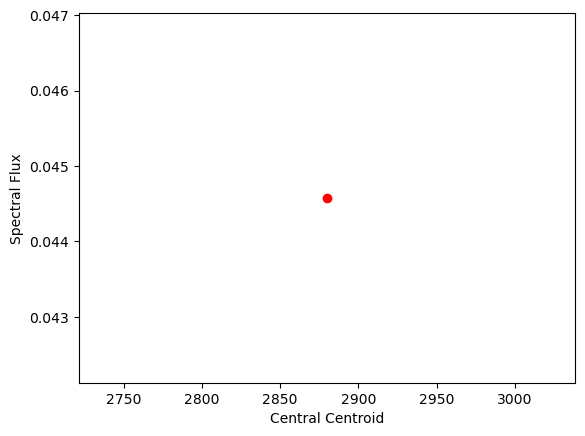

In [3]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

def stft(audio_sample, hamming_length):
    # Load audio file
    samplerate, audio_data = wavfile.read(audio_sample)
    window_length = int(hamming_length * samplerate)

    # Compute STFT of audio signal
    f, t, Zxx = sig.stft(audio_data, fs=samplerate, window='hamming', nperseg=window_length, noverlap=window_length//2, nfft=window_length*2)
    
    # Compute magnitude spectrogram
    Sxx = np.abs(Zxx)
    
    # Compute frequency centroid of each time slice
    freqs = f.reshape(-1, 1)
    cent = np.sum(freqs * Sxx, axis=0) / np.sum(Sxx, axis=0)
    
    # Compute spectral flux
    flux = np.sqrt(np.sum(np.diff(Sxx, axis=1) ** 2, axis=0))
    
    # Plot magnitude spectrogram
    plt.pcolormesh(t, f, Sxx)
    plt.title('STFT for ' + str(hamming_length*1000) + 'ms:')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar()
    plt.show()
    
    # Return central centroid and spectral flux
    return np.mean(cent), np.mean(flux)

#Load audio file
cwd = os.getcwd()
audio_sample = os.path.join(cwd, 'speech_utterance.wav')
samplerate, audio_data = wavfile.read(audio_sample)

#Plot the STFT of the audio file
i = [0.02, 0.03, 0.04, 0.05]
for length in i:
    centroid, flux = stft(audio_sample, length)
    #Print the values of SC and SF
    print('Central Centroid for', length*1000, 'ms:', centroid)
    print('Spectral Flux for', length*1000, 'ms :', flux)

    #Plot the SC-SF diagram
    plt.plot([centroid], [flux], 'ro')
    plt.xlabel('Central Centroid')
    plt.ylabel('Spectral Flux')
    plt.show()

***Ερώτημα 3.4:*** Θα πρέπει να φορτώσουμε το αρχείο ήχου 'music.wav' και να το μετατρέψουμε σε mono file, πριν ακολουθήσουμε την ίδια διαδικασία με τα υπόλοιπα ερωτήματα.

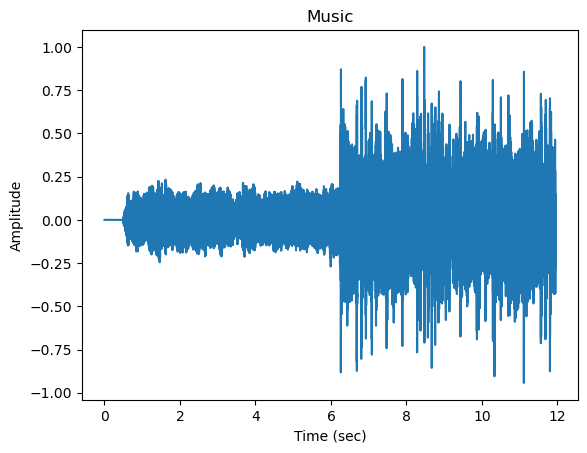

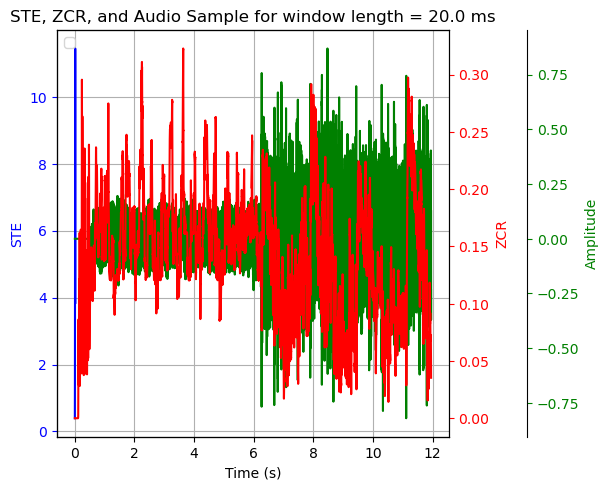

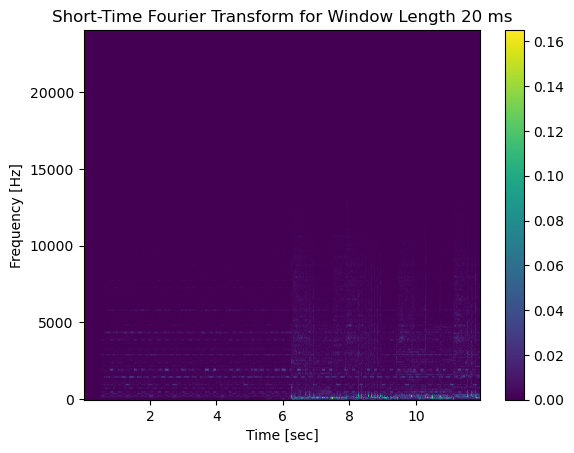

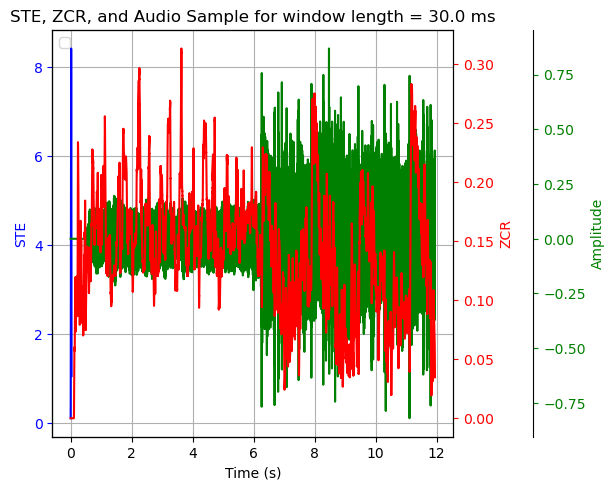

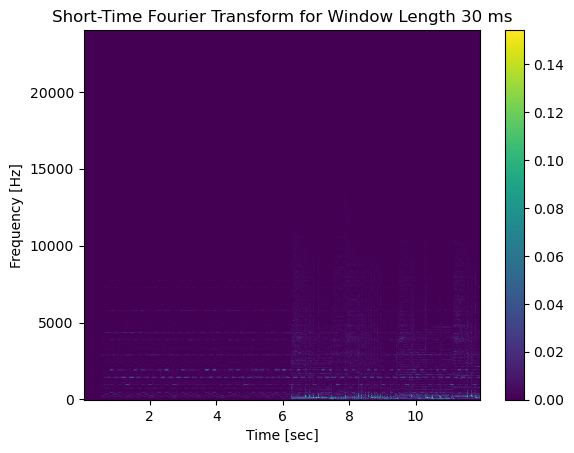

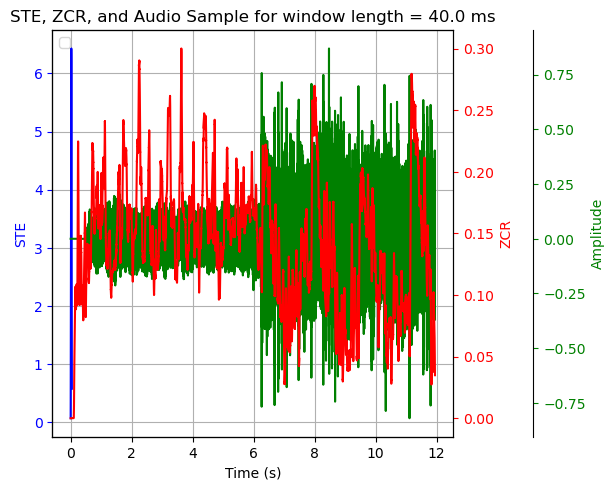

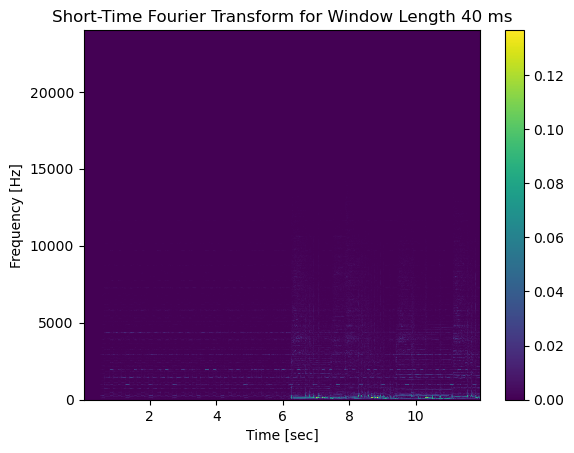

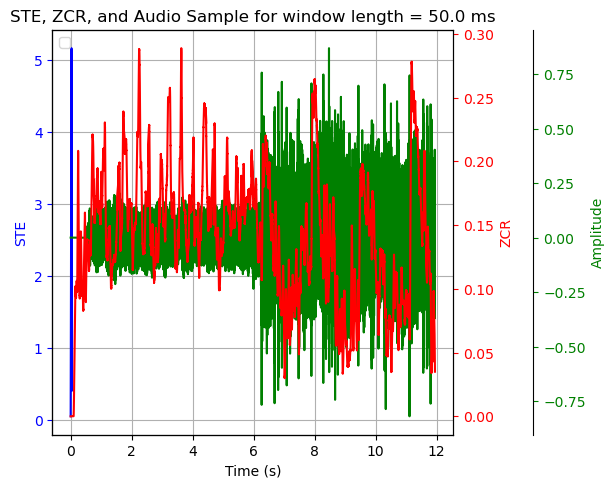

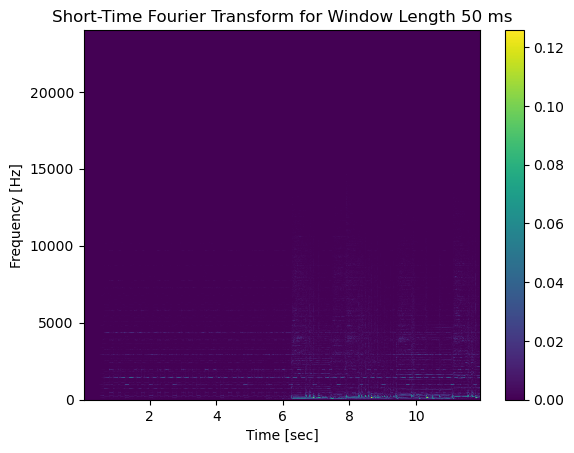

In [10]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.io import wavfile

def stereo_to_mono(audio_file):
    # Load stereo audio file
    with open(audio_file, 'rb') as f:
        samplerate, stereo_audio = wavfile.read(f)

    # Check number of channels
    if len(stereo_audio.shape) > 1 and stereo_audio.shape[1] == 2:
        # Convert stereo to mono
        mono_audio = (stereo_audio[:, 0] + stereo_audio[:, 1]) / 2
        #print('Audio file converted to mono.')
    else:
        #print('Audio file is already mono.')
        mono_audio = stereo_audio

    # Save mono audio file
    wavfile.write('mono_audio.wav', samplerate, mono_audio)
    
def plot_audio_sample(audio_file):
    # Open the audio file
    samplerate, audio_data = wavfile.read(audio_file)

    #Convert data to numpy array
    audio_data = audio_data.astype(np.float32)

    #Normalize the signal to the range [-1, 1]
    audio_data /= np.abs(audio_data).max()

    #Create a time axis for the signal
    time = np.arange(len(audio_data))/samplerate

    #Plot the waveform 
    plt.plot(time, audio_data)
    plt.title("Music")
    plt.ylabel("Amplitude")
    plt.xlabel("Time (sec)")
    plt.show()
    
def plot_ste_zcr(audio_file, window_length_ms):
    # Load audio file
    samplerate, audio_data = wavfile.read(audio_file)
    if len(audio_data.shape) > 1:
        audio_data = np.mean(audio_data, axis=1)  # convert stereo to mono by taking the mean of two channels
    
    # Compute frame length and window length in samples
    frame_length = int(window_length_ms * samplerate)
    
    # Create the energy signal to calculate the STE
    audio_squared = audio_data**2
    
    # Compute STE with a rectangular window
    num_frames = int(np.ceil(len(audio_data) / frame_length))
    ste = np.zeros(num_frames)
    for i in range(num_frames):
        start = i * frame_length
        stop = np.min([start + frame_length, len(audio_data)])
        ste[i] = np.sum(audio_squared[start:stop])
    
    # Create the zero crossing signal to calculate the ZCR
    audio_sign = np.sign(audio_data)
    zcr2 = np.concatenate((np.array([0]), audio_sign[:-1]))  # Shifted audio_sign by 1 sample to the right
    zcr = np.abs(audio_sign - zcr2)
    
    # Create the Hamming window
    window = np.hamming(frame_length)
    
    # Compute STE and ZCR
    STE = np.convolve(window/np.sum(window), ste, mode='same')
    ZCR = np.convolve(window/np.sum(window), zcr, mode='same')
    
    # Plot STE, ZCR, and audio_data
    fig, ax1 = plt.subplots()
    ax1.plot(np.arange(len(STE))/samplerate, STE, 'b-')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('STE', color='b')
    ax1.tick_params('y', colors='b')
    
    ax2 = ax1.twinx()
    ax2.spines["right"].set_position(("axes", 1.2))
    ax2.plot(np.linspace(0, len(audio_data)/samplerate, len(audio_data)), audio_data, 'g-')
    ax2.set_ylabel('Amplitude', color='g')
    ax2.tick_params('y', colors='g')

    ax3 = ax1.twinx()
    ax3.plot(np.arange(len(ZCR))/samplerate, ZCR, 'r-')
    ax3.set_ylabel('ZCR', color='r')
    ax3.tick_params('y', colors='r')

    # Add grid to first subplot
    ax1.grid()
    
    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.4)
    
    # Add legends
    fig.tight_layout()
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')
    
    # Display the plot
    plt.title(f'STE, ZCR, and Audio Sample for window length = {window_length_ms*1000} ms')
    plt.show()

def stft(audio_file, window_length_ms):
    # Load audio file
    samplerate, audio_data = wavfile.read(audio_file)
    if len(audio_data.shape) > 1:
        audio_data = np.mean(audio_data, axis=1)  # convert stereo to mono by taking the mean of two channels

    # Define window parameters
    window_length_samples = int(np.ceil(window_length_ms / 1000 * samplerate))
    hop_size_samples = window_length_samples // 2

    # Compute STFT
    frequencies, times, stft_data = sp.signal.stft(
        audio_data, fs=samplerate, window="hann", nperseg=window_length_samples, noverlap=hop_size_samples, boundary=None
    )

    # Plot STFT
    plt.pcolormesh(times, frequencies, np.abs(stft_data), cmap="viridis")
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("Time [sec]")
    plt.title(f'Short-Time Fourier Transform for Window Length {window_length_ms} ms')
    plt.colorbar()
    plt.show()
    
cwd = os.getcwd()
path_file  = os.path.join(cwd, 'music.wav')
samplerate, audio_data = wavfile.read(path_file)
    
stereo_to_mono('music.wav')

plot_audio_sample('mono_audio.wav')

Hamming_Window_Length = [20, 30, 40, 50]
samplerate, mono_audio = wavfile.read('mono_audio.wav')

for length in Hamming_Window_Length:
    plot_ste_zcr('music.wav', length/1000)
    stft('music.wav', length)
